# Homework 3 of "Fundamentals of 3D Computer Vision"
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> Professor Shohreh Kasaei </h2>
<h3 style = "color: cyan"> Related TA: AmirHossein Razlighi <h3>
<h4 style = "color: white"> Ask your questions via quera or <a href="mailto:arazlighi@gmail.com">email</a></h4>
<h5> Save your file with format: STUDENT NUMBER_HW3.ipynb or .zip </h5>
</div>

## Question 1: Understanding Rotations in-depth! [45 points]

In this question, we want to visualize some rotations in 3D Space. we will get to understand what are quaternions, and rotation matrices. We will also see how to convert between these representations.

### Quaternions
We know that going from _Real Numbers_ which are 1 dimensional to _Complex Numbers_, we add an axis such that:
$$
Complex\_Number = a + bi
$$
$$
a , b \in \mathbb{R}
$$

Now, what are quaternions? Let's add an axis to the complex numbers! That is quite abstract such that we can not even imagine what it means, right? But it turns out to be a powerful mathematical approach for representing rotations! Let's see how we can represent quaternions:

$$
Quaternion = a + bi + cj + dk
$$
$$
a , b , c , d \in \mathbb{R}
$$

where $i , j , k$ are the imaginary units.

<div style = "text-align:center"><img src="./Images/axis-angle.png" /></div>

As you can see, these abstract terms actually mean something! The first parameter (namely, $a$ in our example) is the angle of rotation and the rest, show the vector of rotation. So, we can represent a rotation in 3D space with a quaternion. But how can we convert between quaternions and rotation matrices? Let's see!

In [ ]:
%pip install numpy matplotlib plotly nbformat scipy

**Note**: You **CAN *NOT*** use ready to use Rotation functions such as `scipy.spatial.transforms` or `cv2`. You should implement the functions yourself. The imported `scipy` library is used in another cases further (and to test your code).

[35 points]

In [11]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

class Rotation:
    '''
    Explanation: in from_* I implement converting the * to quaternion and rotation matrix
    in from_quat I implemented angle axis too since in the questions it is demanded
    something I noticed: the input is different from scipy. scipy gets the quaternion as [x, y, z, w] and we get it as [w, x, y, z]
    '''
    def __init__(self):
        self.rotation_matrix = None
        self.quaternion = None
        self.angle_axis = None

    def from_quat(self, w, x, y, z):
         # TODO: Should return a Rotation object with the given quaternion parameters
        self.quaternion = np.array([w, x, y, z])
        s = w**2+x**2+y**2+z**2
        self.rotation_matrix = np.array([[(w**2+x**2-y**2-z**2)/s, 2*(x*y-w*z)/s, 2*(x*z+w*y)/s],
                                         [2*(x*y+w*z)/s, (w**2-x**2+y**2-z**2)/s, 2*(y*z-w*x)/s],
                                         [2*(x*z-w*y)/s, 2*(w*x+y*z)/s, (w**2-x**2-y**2+z**2)/s]])
       
        tetha = 2*np.arccos(w)
        if tetha == 0:
            self.angle_axis = np.array([0,1, 0, 0])
        else:
            self.angle_axis = np.array([tetha, x/np.sin(tetha/2), y/np.sin(tetha/2), z/np.sin(tetha/2)])
        return self
       

    def from_matrix(self, matrix):
        # TODO: Should return a Rotation object with the given rotation matrix
        self.rotation_matrix = matrix
        m = matrix
        trace= np.trace(m)
        w,x,y,z=(0,0,0,0)
        if trace>0:
            s = np.sqrt(trace+1.0)*2
            w,x,y,z = (0.25*s, (m[2,1]-m[1,2])/s, (m[0,2]-m[2,0])/s, (m[1,0]-m[0,1])/s)
        elif m[0,0]>m[1,1] and m[0,0]>m[2,2]:
            s = np.sqrt(1.0+m[0,0]-m[1,1]-m[2,2])*2
            w,x,y,z = ((m[2,1]-m[1,2])/s, 0.25*s, (m[0,1]+m[1,0])/s, (m[0,2]+m[2,0])/s)
        elif m[1,1]>m[2,2]:
            s = np.sqrt(1.0+m[1,1]-m[0,0]-m[2,2])*2
            w,x,y,z = ((m[0,2]-m[2,0])/s, (m[0,1]+m[1,0])/s, 0.25*s, (m[1,2]+m[2,1])/s)
        else:
            s = np.sqrt(1.0+m[2,2]-m[0,0]-m[1,1])*2
            w,x,y,z = ((m[1,0]-m[0,1])/s, (m[0,2]+m[2,0])/s, (m[1,2]+m[2,1])/s, 0.25*s)
        self.quaternion = np.array([w, x, y, z])
        return self

    def as_matrix(self):
        # TODO: Should convert the Rotation object to a rotation matrix and return the resulting matrix
        return self.rotation_matrix

    def as_quat(self):
        #TODO: Should convert the Rotation object to a quaternion and return the resulting quaternion
        return self.quaternion

    def apply(self, vector):
        #TODO: Should apply the rotation to the given vector and return the resulting vector
        return np.matmul(self.rotation_matrix, vector.T)

## Visualizing a Quaternion [10 points]

Here, we want to rotate a sample vector in 3D space w.r.t a quaternion. You can use the `Rotation` class that you defined above. Visualze the original vector, the rotation vector (which is shown by x, y and z components of quaternion) and the final rotated vector.

In [112]:
original_vector = np.array([3, 5, 7])
original_vector = original_vector / np.linalg.norm(original_vector)

rotation_quaternion = np.array([0.25, 0.5, 0.15,0.05]) # in the order (q_0, q_1, q_2, q_3)


rotation_object = Rotation().from_quat(*rotation_quaternion)
rotation_matrix = rotation_object.as_matrix()

rotation_axis_quat = rotation_object.angle_axis[1:4]
rotation_result = rotation_object.apply(original_vector)
# Do the visualizations using plotly
#TODO: Visualize original_vector, rotation_axis_quat and rotated vector
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}]])
fig.add_trace(go.Scatter3d(x=[0, original_vector[0]], y=[0, original_vector[1]], z=[0, original_vector[2]], name='original_vector', marker=dict(color="red")), row=1, col=1)
fig.add_trace(go.Scatter3d(x=[0, rotation_result[0]], y=[0, rotation_result[1]], z=[0, rotation_result[2]], name='rotated vector', marker=dict(color="blue")), row=1, col=1)
fig.add_trace(go.Scatter3d(x=[0, rotation_axis_quat[0]], y=[0, rotation_axis_quat[1]], z=[0, rotation_axis_quat[2]], name='rotation_axis_quat', marker=dict(color="green")), row=1, col=1)


### Testing your implementations 
(Your implementations should pass the tests below. **Don't** change the codes in these cells. Just run them!)

In [15]:
from scipy.spatial.transform import Rotation as R

# Testing your code (Do not change this part of the code)
for i in range(5):
    original_vector = np.random.rand(3)
    original_vector = original_vector / np.linalg.norm(original_vector)
    rotation_quaternion = np.random.rand(4)
    rotation_quaternion = rotation_quaternion / np.linalg.norm(rotation_quaternion)
    rotation_object = Rotation().from_quat(*rotation_quaternion)
    rotation_matrix = rotation_object.as_matrix()
    rotated_vector = rotation_object.apply(original_vector)
    assert np.allclose(
        rotation_matrix,
        R.from_quat(rotation_quaternion[[1, 2, 3, 0]]).as_matrix(),
        atol=1e-6,
        rtol=1e-6,
    )

    assert np.allclose(
        rotated_vector,
        R.from_quat(rotation_quaternion[[1, 2, 3, 0]]).apply(original_vector),
        atol=1e-6,
        rtol=1e-6,
    )

In [16]:
# Testing your code (Do not change this part of the code)
for i in range(5):
    original_vector = np.random.rand(3)
    original_vector = original_vector / np.linalg.norm(original_vector)
    rotation_matrix = R.random().as_matrix()
    rotation_object = Rotation().from_matrix(rotation_matrix)
    rotation_quaternion = rotation_object.as_quat()
    rotated_vector = rotation_object.apply(original_vector)
    
    assert np.allclose(
        rotation_quaternion,
        R.from_matrix(rotation_matrix).as_quat()[[3, 0, 1, 2]],
        atol=1e-6,
        rtol=1e-6,
    ) or np.allclose(
        rotation_quaternion,
        -R.from_matrix(rotation_matrix).as_quat()[[3, 0, 1, 2]],
        atol=1e-6,
        rtol=1e-6,
    )

    assert np.allclose(
        rotated_vector,
        R.from_matrix(rotation_matrix).apply(original_vector),
        atol=1e-6,
        rtol=1e-6,
    )

# Question 2: Estimating Camera Pose from 2D-3D correspondences [55 points]

In this question, you are given a set of 2D-3D correspondences. You are also given the intrinsic parameters of the camera. You need to estimate the pose of the camera (R & T) in the world coordinate system. Let's start!

- Step1: Creating the dataset (Corresponding 3d-2d points):
  
  Just run the cell below without changing it!

In [110]:
from scipy.spatial.transform import Rotation as R
import numpy as np

rot = R.random().as_matrix()
trans = np.array([5, 10, 15])

_3d_points = np.random.rand(100, 3)
_3d_points = _3d_points - np.mean(_3d_points, axis=0)
_3d_points_normalized = _3d_points / np.linalg.norm(_3d_points, axis=1)[:, None]


_2d_points = []
for i in range(100):
    _2d_points.append(rot @ _3d_points_normalized[i] + trans)

_2d_points = np.array(_2d_points)
_2d_points[:, :] /= _2d_points[:, 2][:, None]

[10 points]

In [111]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Visualize 3D points and the projected 2d points(on image plane) to get a sense of the data
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scatter3d"}]])
fig.update_layout(title_text="3D Points and 2D Points")
fig.add_trace(
    go.Scatter3d(
        x=_3d_points[:, 0],
        y=_3d_points[:, 1],
        z=_3d_points[:, 2],
        mode="markers",
        marker=dict(size=10, color="red")
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter3d(
        x=_2d_points[:, 0],
        y=_2d_points[:, 1],
        z=_2d_points[:, 2],
        mode="markers",
        marker=dict(size=10, color="blue")
    ),
    row=1,
    col=1,
)


### Estimate the Pose matrix(H) using LSE method and the given dataset:

We know that for converting a 3D point to a 2D point, we can use the following equation:
$$
\lambda x = K (RX + T)
$$

Here, for the sake of simplicity, consider $K=I$ and $\lambda = 1$. So, we have:
$$
x = RX + T
$$

We can stack $R \& T$ together in an $H$ matrix (you may seen this as $g$ in the course's slides) and write this as:
$$
x = HX
$$

**Here, the task is simply estimating the matrix $H$, given the data correspondences we had earlier. Use LSE to estimate the matrix H and then print it out. You can use Regularization term and any desired number of iterations to reach your desired accuracy.**

[35 points]

# Warning
There are two implementations here.
</br>
The seconds one considers the fact that R in unitary and the result is a bit better as a result.
</br>
For the first one, it is up to the initialization and good choice of parameters to achive a resonable result
</br>
but the second one mostly finds a better optimum.
</br>
I find the matrix H without giving a flying duck about the properties of matrix R

In [95]:
#TODO: Do LSE on the 2D and 3D points to recover the pose of camera
def get_loss(h,X,Y,Z,x,y):
    a = np.array([X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x]).T
    b = np.array([0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y]).T
    return np.matmul(a.T,h)**2 + np.matmul(b.T,h)**2 

def derivative_cal(h,X,Y,Z,x,y):
    a = np.array([X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x]).T
    b = np.array([0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y]).T
    derivative = 2*np.matmul(a.T, h)*a + 2*np.matmul(b.T, h)*b
    return derivative.reshape((12,1))

H = np.random.normal(size=(12,1))
lr = 0.005
for it in range(2000):
    derivative = np.zeros((12, 1))
    # I ain't doing sgd. I'm using all the points
    for i in range(100):
        derivative += derivative_cal(H, _3d_points[i, 0], _3d_points[i, 1], _3d_points[i, 2], _2d_points[i, 0], _2d_points[i, 1])
   
    H -= lr*derivative
    loss = 0
    for i in range(100):
        loss = loss + get_loss(H, _3d_points[i, 0], _3d_points[i, 1], _3d_points[i, 2], _2d_points[i, 0], _2d_points[i, 1])
    if it%500==0:  
        print(f"loss at iteration {it} is {loss}")
H = H.reshape((3,4))
print("Estimated Homogeneous Matrix (H):\n",H)

loss at iteration 0 is [54.70742391]
loss at iteration 500 is [0.02562115]
loss at iteration 1000 is [0.02145865]
loss at iteration 1500 is [0.01800808]
Estimated Homogeneous Matrix (H):
 [[-0.0387854   0.02082614 -0.07784918 -0.21934647]
 [-0.23690217  0.12365522 -0.1644831  -0.44868343]
 [-0.37336557  0.04876832 -0.16245738 -0.67089928]]


[10 points]

In [96]:
# Calculate the reprojection error
#TODO
# notice there are 100 points
def calerror(H,points3d,points2d):
    err = 0
    for i in range(100):
        proj = np.matmul(H, np.array([points3d[i, 0], points3d[i, 1], points3d[i, 2], 1]).T)
        err += np.linalg.norm(proj[:2]/proj[2] - np.array([points2d[i, 0], points2d[i, 1]]).T)
    return err

error = 0
print("error: ", calerror(H, _3d_points, _2d_points))
    

error:  1.6127733778836855


A figure of the points

In [97]:
# do the H matrix on 3d points and store it and show it
_2d_points_pred = []
H = H.reshape((3,4))
for i in range(100):
    _2d_points_pred.append(H @ np.array([_3d_points[i, 0], _3d_points[i, 1], _3d_points[i, 2], 1]).T)
    _2d_points_pred[i] /= _2d_points_pred[i][2]
_2d_points_pred = np.array(_2d_points_pred)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scatter3d"}, {"type": "scatter"}]])
fig.add_trace(
    go.Scatter3d(
        x=_3d_points[:, 0],
        y=_3d_points[:, 1],
        z=_3d_points[:, 2],
        mode="markers",
        line=dict(color="red", width=1),
        marker=dict(size=5, color="red"),
        name="3d points"
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter3d(
        x=_2d_points[:, 0],
        y=_2d_points[:, 1],
        z=_2d_points[:, 2],
        mode="markers",
        marker=dict(size=5, color="blue"),
        name="true 2d points"
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter3d(
        x=_2d_points_pred[:, 0],
        y=_2d_points_pred[:, 1],
        z=_2d_points_pred[:, 2],
        mode="markers",
        marker=dict(size=5, color="green"),
        name="predicted 2dpoints"
    ),
    row=1,
    col=1,
)

# Second Implimentation
HERE we use the fact that R is unitary and the results get much better

In [81]:
def get_R(H):
    k = H.reshape((3,4))
    K = k[:,0:3]
    KKT = np.matmul(K, K.T)
    return k,KKT

def deriv_r(R, RRT):
    K = RRT-np.identity(3)
    der = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            der[i,j]= 4 * np.dot(K[i,:], R[:,j])
    der = np.hstack((der, np.zeros((3,1))))
    return der.flatten()

def get_loss(h,X,Y,Z,x,y):
    a = np.array([X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x]).T
    b = np.array([0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y]).T
    R = h.reshape((3,4))[0:3,0:3]
    RRT = np.matmul(R, R.T)
    return np.matmul(a.T,h)**2 + np.matmul(b.T,h)**2 + 0.1*np.linalg.norm(RRT-np.identity(3))**2

def derivative_cal(h,X,Y,Z,x,y):
    a = np.array([X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x]).T
    b = np.array([0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y]).T
    R,RRT = get_R(h)
    derivative = 2*np.matmul(a.T, h)*a + 2*np.matmul(b.T, h)*b + 0.1*deriv_r(R, RRT)
    return derivative.reshape((12,1))


In [89]:

H = np.random.normal(size=(12,1))
lr = 0.001
num_iter = 10000
for it in range(num_iter):
    derivative = np.zeros((12, 1))
    for i in range(100):
        derivative += derivative_cal(H, _3d_points[i, 0], _3d_points[i, 1], _3d_points[i, 2], _2d_points[i, 0], _2d_points[i, 1])
    H = H - lr*derivative
    loss = 0
    for i in range(100):
        loss = loss + get_loss(H, _3d_points[i, 0], _3d_points[i, 1], _3d_points[i, 2], _2d_points[i, 0], _2d_points[i, 1])
    if it%500==0:  
        print(loss)
H = H.reshape((3,4))
print("Estimated Homogeneous Matrix (H):\n",H)


[118.83644628]
[14.69655318]
[14.60626507]
[14.46495803]
[14.11767531]
[13.32542722]
[11.77315215]
[9.26236743]
[6.77066846]
[5.15217243]
[4.06857843]
[3.31769487]
[2.80015071]
[2.44572461]
[2.20417765]
[2.04016255]
[1.92910775]
[1.85407841]
[1.80347635]
[1.769396]
Estimated Homogeneous Matrix (H):
 [[ 0.96915414 -0.03075675  0.09975519 -2.1976187 ]
 [ 0.02660495  0.96916835  0.08584356 -4.41632533]
 [-0.08839961 -0.05074867  0.97995345 -6.62715658]]


[10 points]

In [90]:
# Calculate the reprojection error
#TODO
# notice there are 100 points
def calerror(H,points3d,points2d):
    err = 0
    for i in range(100):
        proj = np.matmul(H, np.array([points3d[i, 0], points3d[i, 1], points3d[i, 2], 1]).T)
        err += np.linalg.norm(proj[:2]/proj[2] - np.array([points2d[i, 0], points2d[i, 1]]).T)
    return err

error = 0
print("error: ", calerror(H, _3d_points, _2d_points))

error:  1.6107824359156746


In [91]:
_2d_points_pred = []
H = H.reshape((3,4))
for i in range(100):
    _2d_points_pred.append(H @ np.array([_3d_points[i, 0], _3d_points[i, 1], _3d_points[i, 2], 1]).T)
    _2d_points_pred[i] /= _2d_points_pred[i][2]
_2d_points_pred = np.array(_2d_points_pred)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scatter3d"}, {"type": "scatter"}]])
fig.add_trace(
    go.Scatter3d(
        x=_3d_points[:, 0],
        y=_3d_points[:, 1],
        z=_3d_points[:, 2],
        mode="markers",
        line=dict(color="red", width=1),
        marker=dict(size=5, color="red"),
        name="3d points"
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter3d(
        x=_2d_points[:, 0],
        y=_2d_points[:, 1],
        z=_2d_points[:, 2],
        mode="markers",
        marker=dict(size=5, color="blue"),
        name="true 2d points"
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter3d(
        x=_2d_points_pred[:, 0],
        y=_2d_points_pred[:, 1],
        z=_2d_points_pred[:, 2],
        mode="markers",
        marker=dict(size=5, color="green"),
        name="predicted 2dpoints"
    ),
    row=1,
    col=1,
)



## Question 3: Image Mosaicing [**Extra** 30 points]

The task of image mosaicing is something we use everyday to create panoramas. In this question, we want to create a panorama from a set of images. We will use the homography matrix to do so. Let's start!

**NOTE**: You can use `cv2` library and its functions to do the task and there is no need to implement them from scratch.

In [98]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

Steps for image mosaicing:

1. Find KeyPoint in 2 images (frame n and frame n+1)
2. Match the keypoints to find the nearest neighbors of each pixel.
3. Estimate the Homography matrix using the matched keypoints.
4. Use the homography matrix to warp the images and create the panorama.

Let's start doing these steps!

### Find Keypoints in 2 images
Read the images from `./Images_Question3`. They are named `image1` to `image4`. Set the origin image to 1st image and the destination image to 2nd. We need to find important features in the images so we can understand the correspondence between them. How? Here we simply use `SIFT` algorithm to find the keypoints. You can use `cv2.SIFT_create()` to create a SIFT object and then use `sift.detectAndCompute()` to find the keypoints and descriptors. You can also use `cv2.drawKeypoints()` to draw the keypoints on the images.

### Match the keypoints to find nearest pixels
Now, we have 2 descriptors of the images, thanks to SIFT! These 2 are used to describe the image and everything in them. Now, we want to find the nearest neighbors of each pixel in origin to find out which pixel is the closest to it, in destination. Here again, you can use opencv functions for ease! Just use BruteForce matcher:
```python
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
```
The `matches` object now contains the matches between these 2 images. you can access each item and it's info in matches. For example:
```
all_matches_idxs = [(m.trainIdx, m.queryIdx) for m, n in matches]
```

### Estimate Homography matrix

What is a homography matrix? You are familiar with _Homogeneous_ Matrices to represent pose of a camera. Now, suppose we see everything in our world as planar! So, we project every 3d point to a specific plane in the world, because in panorama images, we don't care about depth, do we?! Let's loook at the image below to understand it better:

<div style = "text-align:center"><img src="./Images/homography_transformation.jpg" /></div>

You can read more about it (and it's recommended!). But if you don't want to, it's allrigh! You just think of it as a **Transformation between points in image 1 and image 2**. In opencv, we do:
```
(H, status) = cv2.findHomography(pts1, pts2, cv2.RANSAC, reprojThreshold)
```


### Use the homography matrix to warp the images and create the panorama
Finally, simply we should bring the image2 corresponding points (in camera view 1) and then append them together in an image. So, We have $H$ which transforms points from view 1 to view 2 and vice verca. We simply use opencv to do the projection:

```
            result = cv2.warpPerspective(
                img1_orig,
                H,
                (img1_orig.shape[1] + img2_orig.shape[1], img1_orig.shape[0]),
            )
            result[0 : img2_orig.shape[0], 0 : img2_orig.shape[1]] = img2_orig
```


[You get all 30 extra points, if you implement **all of the parts** correctly and get the *correct results*!]

In [2]:
# _. Load the images
images = []
for i in range(1, 5):
    images.append(cv2.imread(f"Images_Question3/image{i}.jpg"))
    images[i-1] = cv2.cvtColor(images[i-1], cv2.COLOR_BGR2RGB)
# 1. Detect the keypoints and compute the descriptors
# 2. Match the keypoints
# 3. Draw the matches
# 4. Calculate the homographic matrix
# 5. Warp the image
# In each step, you should plot the images that are being matched (for mosaicing), the matched image (using cv2.drawMatchesKnn) and the panorama image created until that step

In [10]:
def match(origin,dest):
    # part 1
    origin_sift = cv2.SIFT_create()
    origin_kp, origin_desc = origin_sift.detectAndCompute(origin, None)
    dest_sift = cv2.SIFT_create()
    dest_kp, dest_desc = dest_sift.detectAndCompute(dest, None)
    # part 2
    bf = cv2.BFMatcher(cv2.NORM_L2)
    matches = bf.knnMatch(origin_desc, dest_desc, k=2)
    good = []
    for m,n in matches:
        if m.distance < 0.8*n.distance: #0.9 ro entekhab kardam shekl nazdik result khodetun she
            good.append([m])
    # part 3
    result = cv2.drawMatchesKnn(origin, origin_kp, dest, dest_kp, good, None, flags=2)
    # part 4
    src_pts = np.float32([ origin_kp[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ dest_kp[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    h,w = origin.shape[:2]
    # part 5
    warped = cv2.warpPerspective(origin, H, (w+dest.shape[1], h))
    warped[0:dest.shape[0], 0:dest.shape[1]:] = dest
    # make the transition of colors between two images smooth because the shades differ
    warped[:,dest.shape[1]-5:dest.shape[1]+5] = np.mean([warped[:,dest.shape[1]-5:dest.shape[1]+5], warped[:,dest.shape[1]-5:dest.shape[1]+5]], axis=0)
    zero_col = min(np.where(~warped.any(axis=0))[0])
    warped = warped[:,:zero_col]
    # showing the figures (last comment in the cell above)
    fig = plt.figure(figsize=(20, 20))
    plt.subplot(1, 4, 1)
    plt.imshow(origin)
    plt.title("Origin")
    plt.subplot(1, 4, 2)
    plt.imshow(dest)
    plt.title("Dest")
    plt.subplot(1,4,3)
    plt.imshow(result)
    plt.title("Matches")
    plt.subplot(1, 4, 4)
    plt.imshow(warped)
    plt.title("Result")
    plt.show()
    return warped


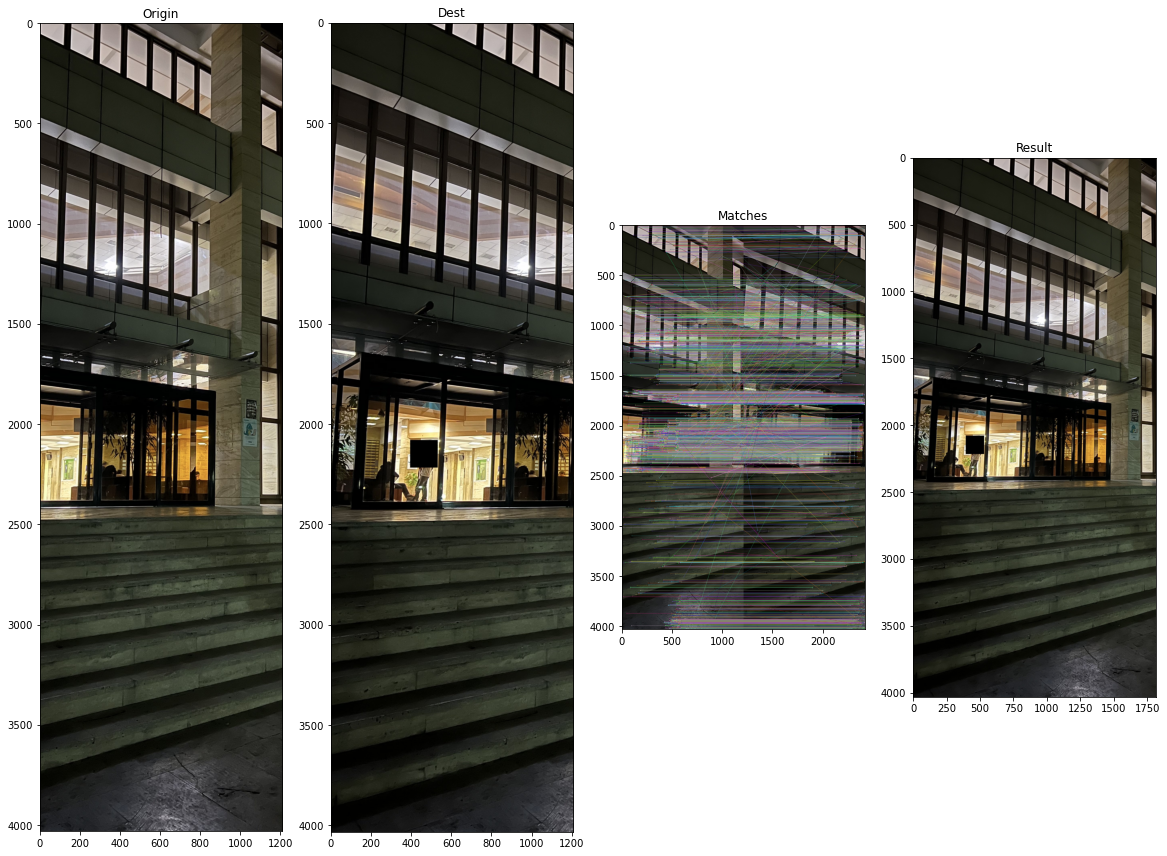

In [11]:
w = match(images[1],images[0])

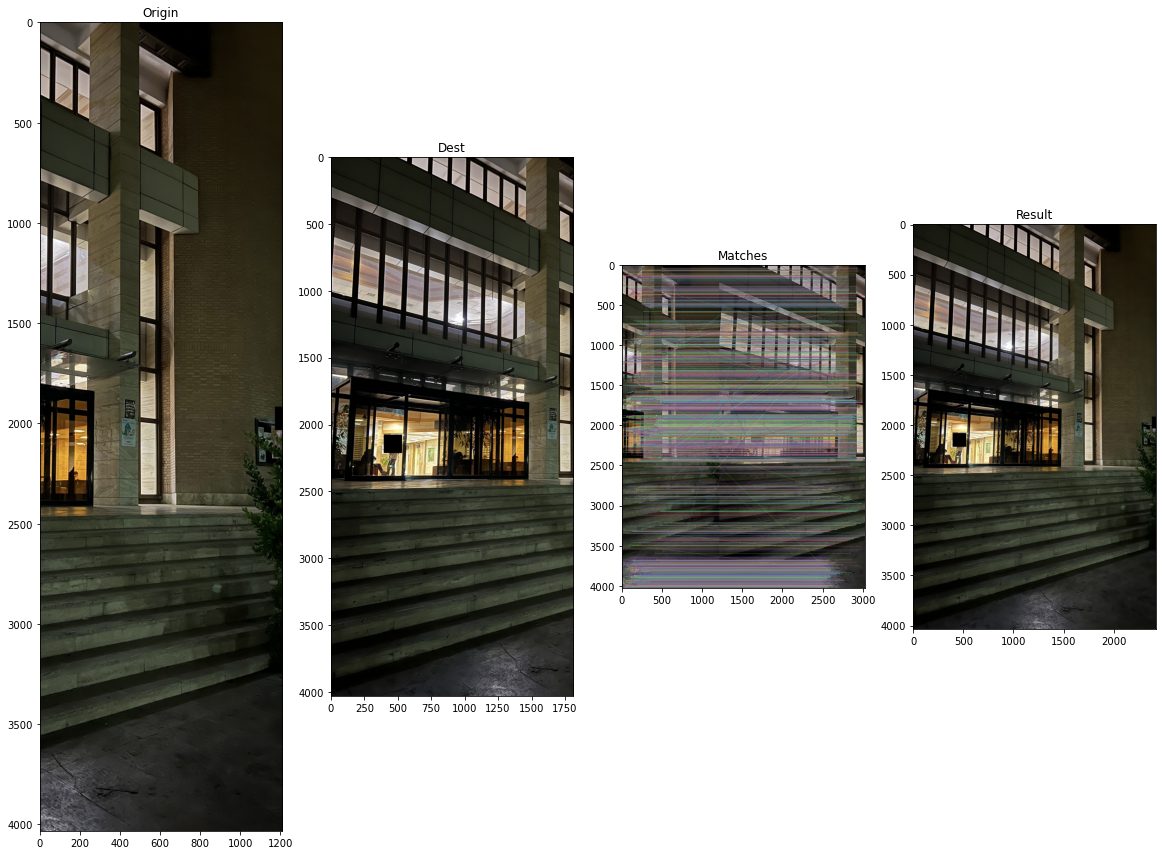

In [12]:
w = match(images[2],w)

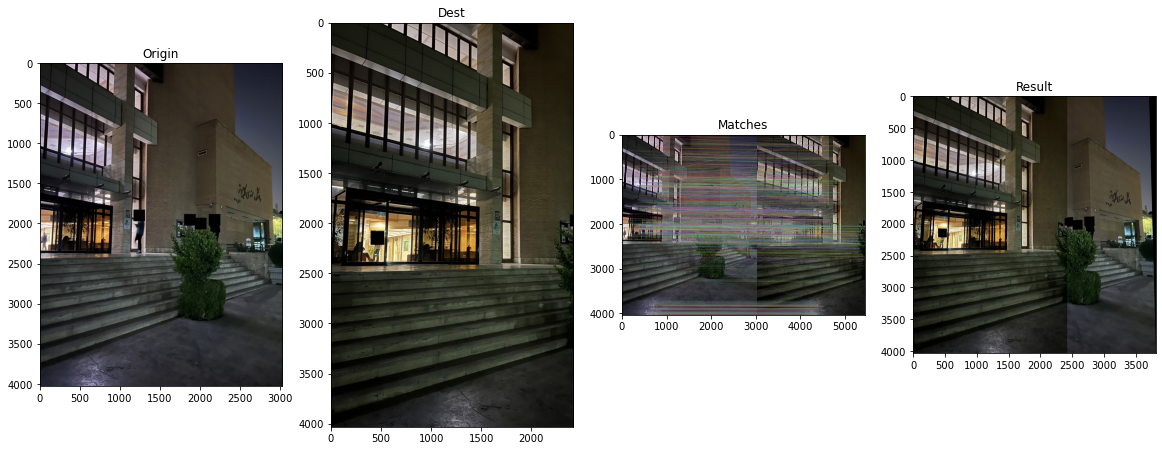

In [13]:
w = match(images[3],w)

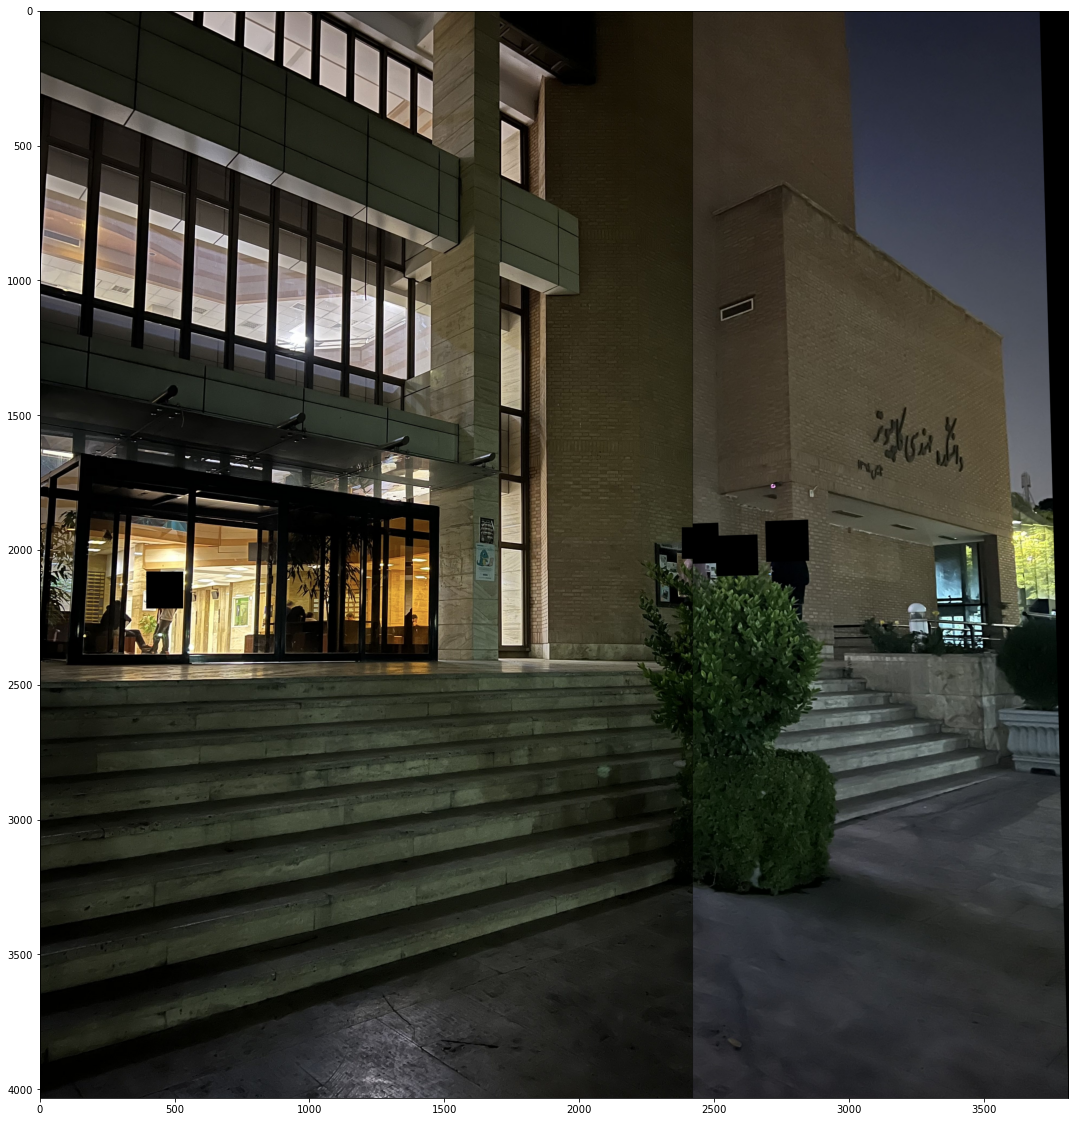

In [109]:
# tasvir nahaei
plt.figure(figsize=(20, 20))
plt.imshow(w)